In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = 10, 5
plt.style.use('bmh')

In [3]:
wire_ws = np.array([38, 50, 76, 100, 120, 150]) * 1e-6
fringe_ws = np.array([39.52675,
 29.636200000000002,
 20.390840000000004,
 16.005675,
 13.3912375,
 10.847700000000001]) * 1e-3

In [4]:
D = 2.24

In [5]:
lambd = 650 * 1e-9

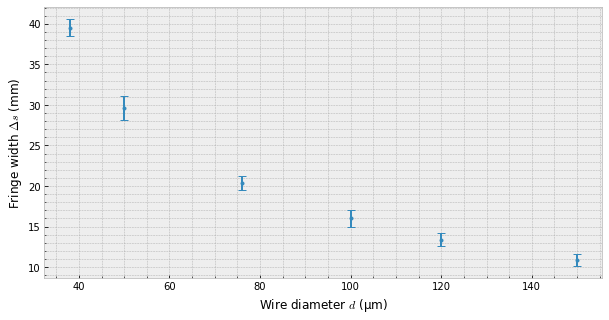

In [19]:
plt.errorbar(wire_ws * 1e6, fringe_ws * 1e3, yerr=np.array([1.075835955199492,
 1.488900000000001,
 0.856218412789634,
 1.056832222670656,
 0.750701356961442,
 0.7090000000000006]), fmt='.', capsize=4)

plt.xlabel("Wire diameter $d$ (µm)")
plt.ylabel("Fringe width $\Delta s$ (mm)")

plt.minorticks_on()

plt.grid(which='minor')

plt.savefig('processed-data/ds_vs_d.png', dpi=160, bbox_inches='tight')

In [12]:
from scipy.stats import linregress

In [13]:
slope, intercept, r_value, _, stderr = linregress(1 / wire_ws, fringe_ws)

Text(0, 0.5, 'Fringe width $\\Delta s$ (m)')

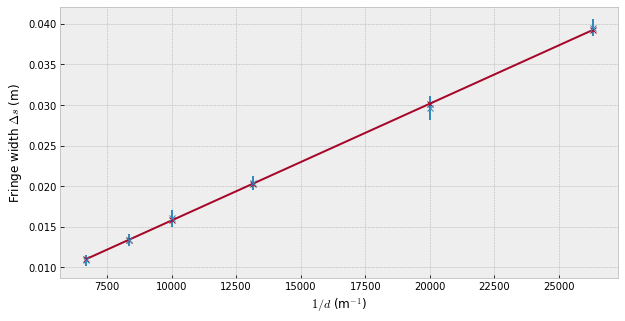

In [18]:
plt.figure()
plt.errorbar(1 / wire_ws, fringe_ws, yerr=np.array([1.074318556108942,
 1.4867999999999988,
 0.8550107704584781,
 1.0553416271520804,
 0.7496425398148107,
 0.7080000000000002]) * 1e-3, fmt='x')
plt.plot(1/wire_ws, slope * (1/wire_ws) + intercept, '-x')
plt.xlabel("$1/d$ (m$^{-1}$)")
plt.ylabel("Fringe width $\Delta s$ (m)")


In [71]:
slope

1.4393146279311757e-06

In [72]:
slope / D * 1e9

642.5511731835605

In [73]:
slope / lambd

2.214330196817193

In [74]:
stderr

1.922587916488978e-08

In [75]:
stderr / D * 1e9

8.58298177004008

In [76]:
intercept

0.0013690321900917818